In [2]:
import pandas as pd
import numpy as np

### Dados Missing fora do padrão


*   Falta do valor.
*   Valores truncados.
*   Valores do usuário.



In [3]:
df = pd.read_csv('C:/0. Alex Souza/GoogleDrive/3. Estudos/Profissional/IA, ML/0. Scripts/1. Tratando Dados (Features, Exploratoria, Clean, Profiling...)/Data Cleaning/file_test.csv')

In [4]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


**Conta a quantidade de missing values por coluna**

In [5]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

**Conta a quantidade de missing values totais da base**

In [6]:
df.isnull().sum().sum()

8

#### Analisando colunas específicas

In [7]:
# Pandas identificou o valor vazio como um NaN, veja no dataset.
df.ST_NUM

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [8]:
# Atente para o valor da última linha
df.NUM_BEDROOMS

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object

In [9]:
# Atente para o valor da última linha
df.NUM_BEDROOMS.isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [10]:
# Coluna string contém valores numéricos
df.OWN_OCCUPIED

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

**Cria uma lista de valores missing**

In [11]:
# lista de missing values
missing_values = ["n/a", "na", "--","."]

In [22]:
df = pd.read_csv("C:/0. Alex Souza/GoogleDrive/3. Estudos/Profissional/IA, ML/0. Scripts/1. Tratando Dados (Features, Exploratoria, Clean, Profiling...)/Data Cleaning/file_test.csv", na_values = missing_values)

In [23]:
df.isnull().sum().sum()

10

In [13]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


**Resolve valores discrepantes**

*   Valores inteiros em strings e vice versa
*   Útil em cleaning antes de treinar algoritmos (scikit-learn)



In [14]:
# Detectando valores numéricos e convertendo para NaN
count=0
for row in df.OWN_OCCUPIED:
    try:
        int(row)   # Tenta converter o valor para inteiro, se OK, atualiza para NaN
        df.loc[count, 'OWN_OCCUPIED']= np.nan
    except ValueError:    # Se der erro continua o loop
        pass
    count+=1

In [15]:
# Veja como ficou após o processamento:
df.OWN_OCCUPIED

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

**Carregue o dataset novamente usando a lista**

In [23]:
df.isnull().sum().sum()

11

### Conhecendo a biblioteca missingno



*   Visualização fácil de missing values por coluna



In [24]:
!pip install quilt

     |████████████████████████████████| 112kB 2.8MB/s 


**Instala pacote com dataset de exemplo**

In [25]:
!quilt install ResidentMario/missingno_data

100% 420k/420k [00:00<00:00, 1.66MB/s]


In [ ]:
from quilt.data.ResidentMario import missingno_data

**Carrega a base de dados**

In [ ]:
df2 = missingno_data.nyc_collision_factors()

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7303 entries, 0 to 7302
Data columns (total 27 columns):
Unnamed: 0                       7303 non-null int64
DATE                             7303 non-null object
TIME                             7303 non-null object
BOROUGH                          7303 non-null object
ZIP CODE                         6919 non-null float64
LATITUDE                         7303 non-null float64
LONGITUDE                        7303 non-null float64
LOCATION                         7303 non-null object
ON STREET NAME                   7303 non-null object
CROSS STREET NAME                7303 non-null object
OFF STREET NAME                  7303 non-null object
NUMBER OF PERSONS INJURED        7303 non-null int64
NUMBER OF PERSONS KILLED         7303 non-null int64
NUMBER OF PEDESTRIANS INJURED    7303 non-null int64
NUMBER OF PEDESTRIANS KILLED     7303 non-null int64
NUMBER OF CYCLISTS INJURED       0 non-null float64
NUMBER OF CYCLISTS KILLED        

In [29]:
df2.isnull().sum()

Unnamed: 0                          0
DATE                                0
TIME                                0
BOROUGH                             0
ZIP CODE                          384
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                      0
CROSS STREET NAME                   0
OFF STREET NAME                     0
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2       0
CONTRIBUTING FACTOR VEHICLE 3       0
CONTRIBUTING FACTOR VEHICLE 4       0
CONTRIBUTING FACTOR VEHICLE 5       0
VEHICLE TYPE CODE 1                 0
VEHICLE TYPE CODE 2                 0
VEHICLE TYPE CODE 3                 0
VEHICLE TYPE CODE 4                 0
VEHICLE TYPE

### Método replace()


*   Substituição de dados a nivel de dataframe.
*   Substituição de dados usando regex



In [ ]:
teste = pd.DataFrame({'A': [0, 1, 2, 3, 4], 'B': [5, 6, 7, 8, 9],'C': ['a', 'b', 'c', 'd', 'e']})

In [32]:
teste

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [33]:
teste.replace(0, 1000)

,A,B,C
0,1000,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [34]:
teste.replace([0, 1, 2, 3, 4], 'Novo valor')

,A,B,C
0,Novo valor,5,a
1,Novo valor,6,b
2,Novo valor,7,c
3,Novo valor,8,d
4,Novo valor,9,e


**Substitui todos os valores string 'nan' por tipo NaN**

In [ ]:
df2.replace("nan", np.NaN, inplace=True)

**Teste a quantidade de valores missing agora**

In [36]:
df2.isnull().sum()

Unnamed: 0                          0
DATE                                0
TIME                                0
BOROUGH                           383
ZIP CODE                          384
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                   1065
CROSS STREET NAME                1137
OFF STREET NAME                  6542
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2    1085
CONTRIBUTING FACTOR VEHICLE 3    7000
CONTRIBUTING FACTOR VEHICLE 4    7244
CONTRIBUTING FACTOR VEHICLE 5    7289
VEHICLE TYPE CODE 1                58
VEHICLE TYPE CODE 2              1520
VEHICLE TYPE CODE 3              7019
VEHICLE TYPE CODE 4              7249
VEHICLE TYPE

In [38]:
# Conta valores únicos incluindo NaN dropna=false
df2['ON STREET NAME'].value_counts(dropna=True)

BROADWAY               88
NORTHERN BOULEVARD     85
ATLANTIC AVENUE        72
3 AVENUE               51
LINDEN BOULEVARD       48
5 AVENUE               46
10 AVENUE              43
7 AVENUE               43
11 AVENUE              41
MAIN STREET            40
9 AVENUE               36
QUEENS BOULEVARD       36
8 AVENUE               35
LIBERTY AVENUE         34
METROPOLITAN AVENUE    34
UTICA AVENUE           34
1 AVENUE               33
65 STREET              32
HYLAN BOULEVARD        32
PENNSYLVANIA AVENUE    32
FLATBUSH AVENUE        32
NOSTRAND AVENUE        31
JAMAICA AVENUE         30
35 AVENUE              29
4 AVENUE               29
21 STREET              29
BEDFORD AVENUE         28
2 AVENUE               28
ROOSEVELT AVENUE       28
KINGS HIGHWAY          27
                       ..
EAST 117 STREET         1
WEST 11 STREET          1
COOPER STREET           1
ATLANTIC AVE            1
86 AVENUE               1
227 STREET              1
EAST 114 STREET         1
133 STREET  

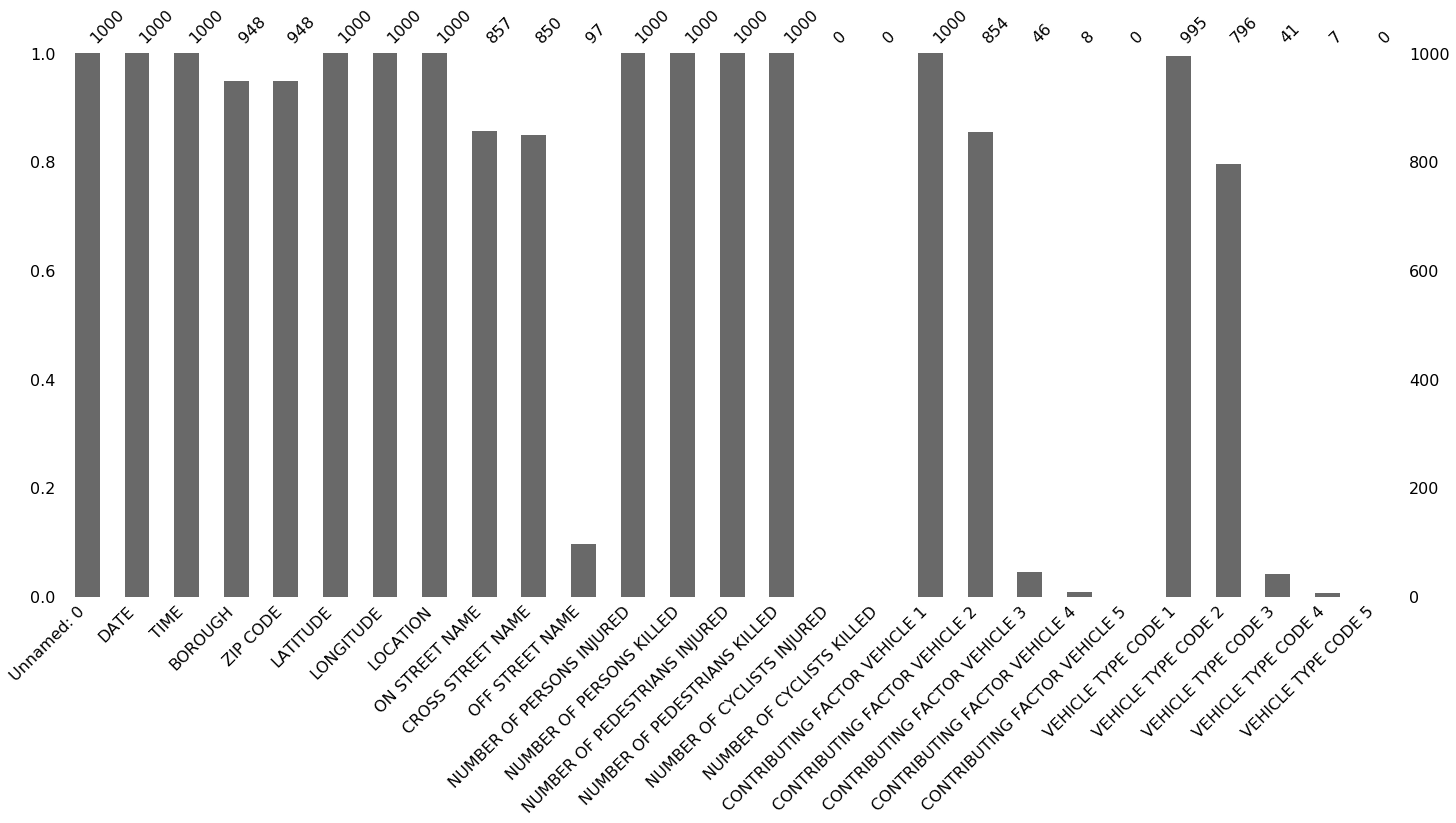

In [39]:
import missingno as msno
msno.bar(df2.sample(1000))

**Gráfico do tipo matrix**

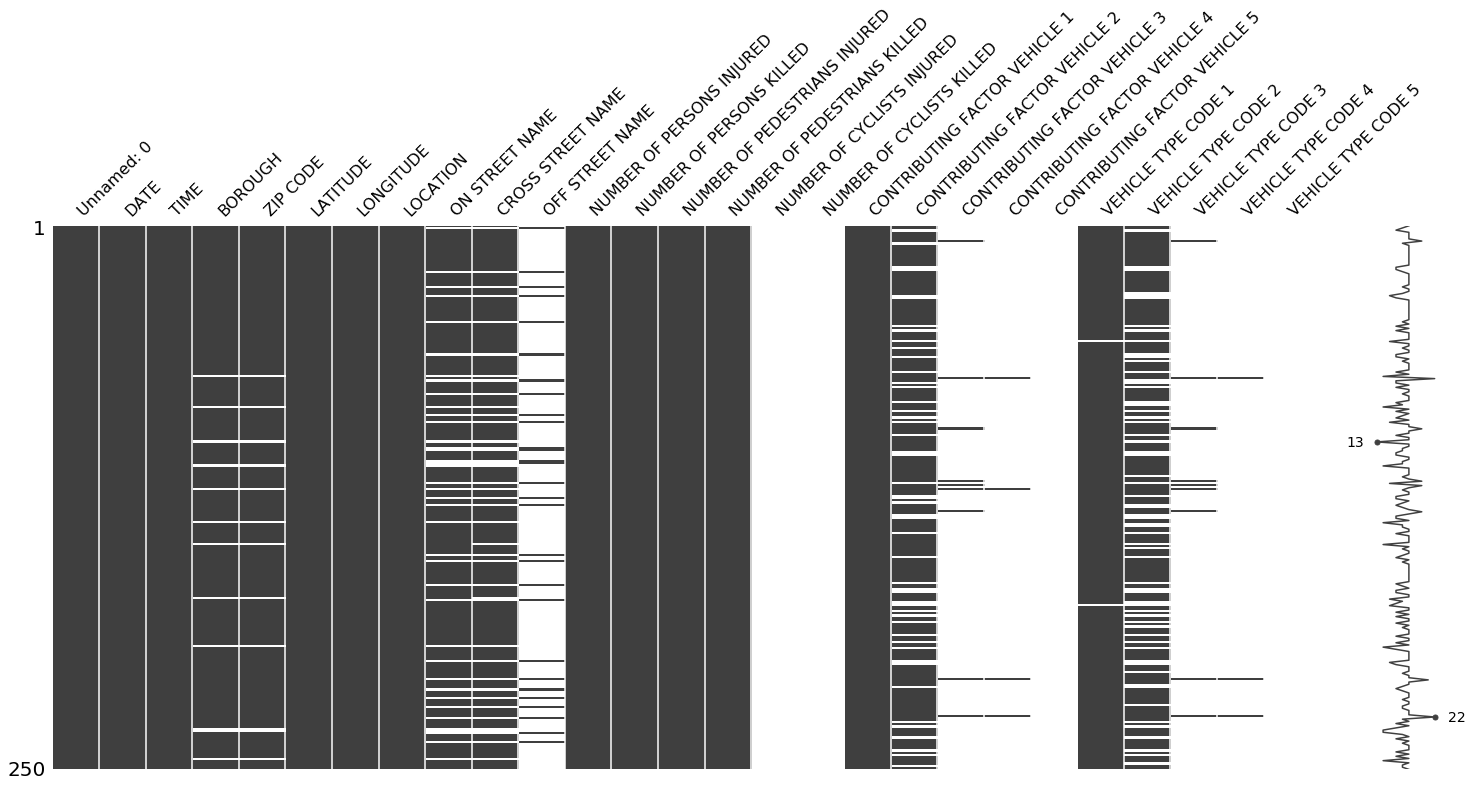

In [40]:
import missingno as msno
%matplotlib inline
msno.matrix(df2.sample(250))

**Removendo colunas com 90% de dados missing**

In [41]:
# 90% numero de linhas
df2.shape[0] *.9

6572.7

**Apaga colunas com 90% de dados missing**

In [ ]:
df2.dropna(thresh=int(df2.shape[0] * .9), axis=1, inplace=True)

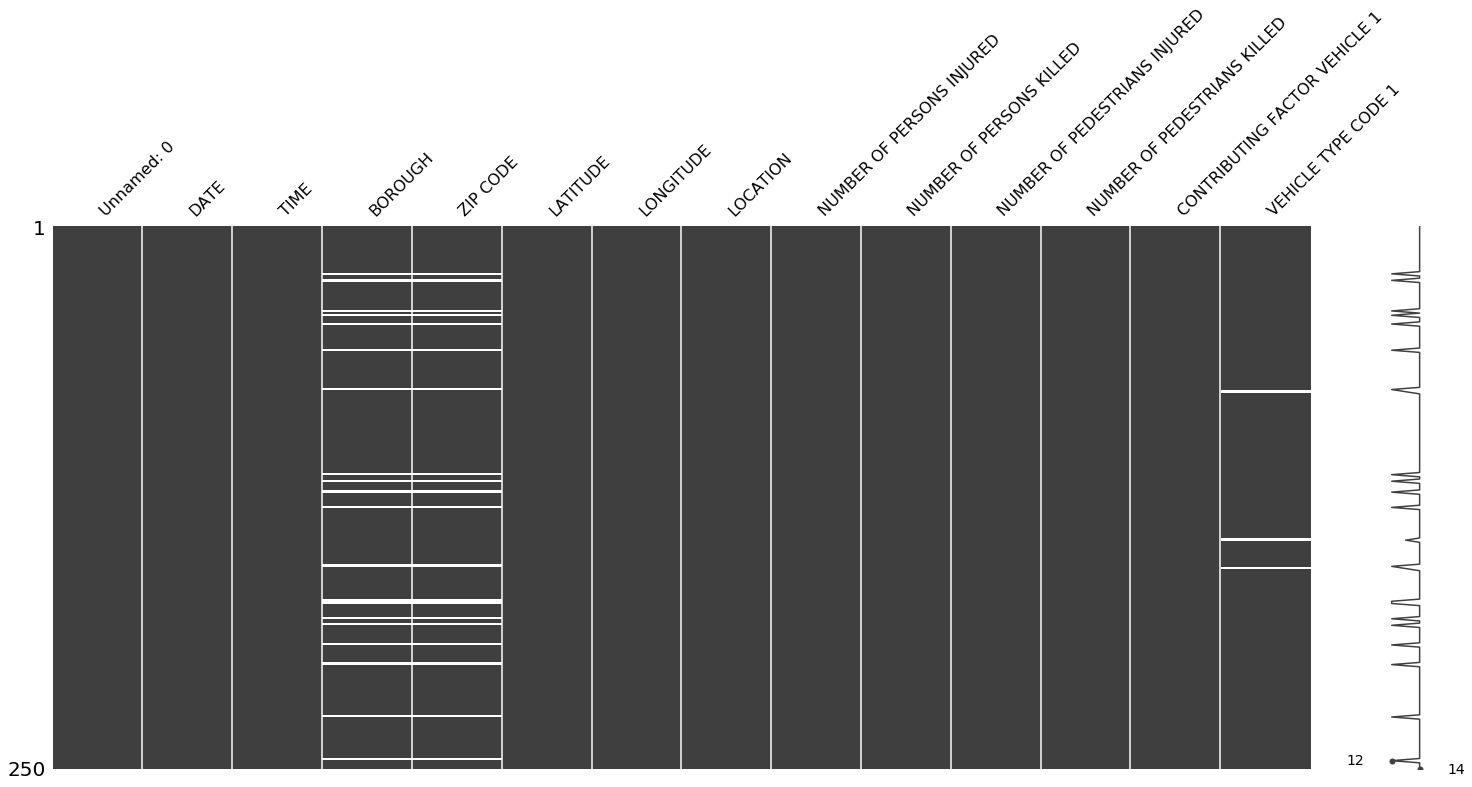

In [43]:
%matplotlib inline
msno.matrix(df2.sample(250))

### Data Cleaning em Textos



*   Tipo de dado normalmente onde se precisa de mais limpeza.
*   Tarefas de pré-processamento adequadas para tipo de tarefas.



**Beautifier é um toolkit para dados da web**

In [17]:
!pip install beautifier

  Created wheel for beautifier: filename=beautifier-0.5.5-py3-none-any.whl size=19306 sha256=9506a6f0c7f9e14230c747b11fbccfa231ef9871dbc1670a48d3a706dd0cf507
  Stored in directory: c:\users\alex.souza\appdata\local\pip\cache\wheels\08\af\bb\3ff6a0b950858dfd6b6607af436007c0b23d61a4767789cba1
Successfully built beautifier


**Recursos para trabalhar com URLs**

In [18]:
from beautifier import Url
url = Url('https://in.linkedin.com/in/sachinphilip?authtoken=887nasdadasd6hasdtg21&secret=98jy766yhhuhnjk')
url.cleanup

'https://in.linkedin.com/in/sachinphilip'

In [19]:
url.domain

'in.linkedin.com'

In [20]:
url.param

['authtoken=887nasdadasd6hasdtg21', 'secret=98jy766yhhuhnjk']

**Recursos para trabalhar com dados de e-mail**

In [21]:
from beautifier import Email

In [24]:
f = open("C:/0. Alex Souza/GoogleDrive/3. Estudos/Profissional/IA, ML/0. Scripts/1. Tratando Dados (Features, Exploratoria, Clean, Profiling...)/Data Cleaning/emails.txt", "r")
for i in f.readlines():
  obj_email = Email(i)
  print ("Username: {}, Dominio: {}, valido: {}".format(obj_email.username,obj_email.domain, obj_email.is_valid))

Username: a_vanessinha_1990, Dominio: hotmail.com, valido: True
Username: a3sign, Dominio: pandora.be, valido: True
Username: aaanika2, Dominio: hotmail.com, valido: True
Username: aaron2003s, Dominio: bol.com.br, valido: True
Username: aaron--21, Dominio: hotmail.com, valido: True
Username: abidoral, Dominio: hotmail.com, valido: True
Username: abk_333, Dominio: hotmail.com, valido: True
Username: abner_bim, Dominio: hotmail.com, valido: True
Username: abner_bim, Dominio: hotmail.com, valido: True
Username: acacio_divix, Dominio: hotmail.com, valido: True
Username: academia.boaforma, Dominio: yahoo.com.br, valido: True
Username: ac-ferian, Dominio: bol.com.br, valido: True
Username: acordarsono, Dominio: hotmail.com, valido: True
Username: acsa_lim, Dominio: yahoo.com.br, valido: True
Username: adamyth, Dominio: gmail.com, valido: True
Username: add_ae_jente, Dominio: yahoo.com.br, valido: True
Username: addgeral, Dominio: gmail.com, valido: True
Username: addyevusk, Dominio: yahoo.co

**Verificando tipos de domínio**

In [26]:
f = open("C:/0. Alex Souza/GoogleDrive/3. Estudos/Profissional/IA, ML/0. Scripts/1. Tratando Dados (Features, Exploratoria, Clean, Profiling...)/Data Cleaning/emails.txt", "r")
for i in f.readlines():
  obj_email = Email(i)
  if obj_email.is_free_email == True:
    print ("Emails corporativos: {}".format(i))

Emails corporativos: a_vanessinha_1990@hotmail.com

Emails corporativos: aaanika2@hotmail.com

Emails corporativos: aaron2003s@bol.com.br

Emails corporativos: aaron--21@hotmail.com

Emails corporativos: abidoral@hotmail.com

Emails corporativos: abk_333@hotmail.com

Emails corporativos: abner_bim@hotmail.com

Emails corporativos: abner_bim@hotmail.com

Emails corporativos: acacio_divix@hotmail.com

Emails corporativos: academia.boaforma@yahoo.com.br

Emails corporativos: ac-ferian@bol.com.br

Emails corporativos: acordarsono@hotmail.com

Emails corporativos: acsa_lim@yahoo.com.br

Emails corporativos: adamyth@gmail.com

Emails corporativos: add_ae_jente@yahoo.com.br

Emails corporativos: addgeral@gmail.com

Emails corporativos: addyevusk@yahoo.com.br

Emails corporativos: adeozemir@yahoo.com.br

Emails corporativos: adhaha@gmail.com

Emails corporativos: adhaha@gmail.com

Emails corporativos: adidas__star@hotmail.com

Emails corporativos: adidas__star@hotmail.com

Emails corporativos:

**Removendo pontuações**

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
pontuacoes = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('','',pontuacoes))

In [29]:
remove_punctuation("!!!This is cool!!_*&%$#")

'This is cool'

**Removendo URLS**

In [30]:
import re
def remove_urls(text):
    url_padrao = re.compile(r'https?://\S+|www\.\S+')
    return url_padrao.sub(r'', text)

In [31]:
remove_urls('O site do minerandodados é www.minerandodados.com.br ou https://minerandodados.com.br')

'O site do minerandodados é  ou '

**Removendo tags html**

In [32]:
def remove_html(texto):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', texto)

In [33]:
texto = """<div>
<h1> Minerando Dados</h1>
<p> Aulas de Data Science ao vivo toda semana!</p>
<a href="https://minerandodados.com.br"> Data Science e Machine Learning de forma fácil</a>
</div>"""

In [34]:
print(remove_html(texto))


 Minerando Dados
 Aulas de Data Science ao vivo toda semana!
 Data Science e Machine Learning de forma fácil



**Tudo em uma mesma função**

In [35]:
import string
import re

def cleaning_text(text):
  text = text.lower()
  pontuacoes = string.punctuation
  url_padrao = re.compile(r'https?://\S+|www\.\S+')
  html_padrao = re.compile('<.*?>')
  text_temp = html_padrao.sub(r'', text)
  text_temp = url_padrao.sub(r'', text_temp)
  text_temp = text_temp.translate(str.maketrans('','',pontuacoes))
  return text_temp

In [36]:
cleaning_text("<h1>O site do minerandodados é https://minerandodados.com.br enjoy !!!</h1>")

'o site do minerandodados é  enjoy '

### Versionamento de Dataframes

**Dora - Toolkit para Análise Exploratória de dados**

*   Roda em cima do pandas e scikit-learn
*   Contém métodos para simplificar tarefas
*   Cria versões de Dataframes



In [37]:
!pip install Dora

  Created wheel for Dora: filename=Dora-0.0.3-py3-none-any.whl size=3371 sha256=d1647fed43da0e8bc0d9a91f9850ceb57045e1cc123c9c9ed0048c6fd0cc584b
  Stored in directory: c:\users\alex.souza\appdata\local\pip\cache\wheels\e5\01\df\30896006ee88f3f23ebe4960474a8df25958eeacc1ca26d8bd
Successfully built Dora


**Importe o Dora e carrega o arquivo de dados**

In [38]:
from Dora import Dora

In [ ]:
df = missingno_data.nyc_collision_factors()

**Estancia um objeto dora**

In [ ]:
dora = Dora(output = 0, data = df)

In [80]:
type(dora.data)

pandas.core.frame.DataFrame

In [81]:
dora.data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",0,0,0,0,Failure to Yield Right-of-Way,TAXI
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",1,0,1,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",0,0,0,0,Lost Consciousness,PASSENGER VEHICLE
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE


In [ ]:
# Pressione tab para visualizar métodos e atributos
dora.

**Cria um snapshot**

In [ ]:
dora.snapshot('versao-0')

**Remove a coluna LOCATION**

In [ ]:
dora.remove_feature('LOCATION')

In [84]:
dora.data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,0,0,0,0,Failure to Yield Right-of-Way,TAXI
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,1,0,1,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,0,0,0,0,Lost Consciousness,PASSENGER VEHICLE
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE


In [85]:
dora.logs

["self.remove_feature('LOCATION')"]

**Mais alterações**

In [ ]:
dora.data['LAT_LONG'] = dora.data.LATITUDE + dora.data.LONGITUDE

In [87]:
dora.data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,LAT_LONG
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,0,0,0,0,Failure to Yield Right-of-Way,TAXI,-33.209493
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,1,0,1,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.287022
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,0,0,0,0,Lost Consciousness,PASSENGER VEHICLE,-33.309564
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.135315
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.320585


**Cria mais um snapshot**

In [ ]:
dora.snapshot('versao-1')

**Mais alterações**

In [ ]:
dora.data.drop(['LONGITUDE','LATITUDE'], axis=1, inplace=True)

In [90]:
dora.data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,LAT_LONG
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,0,0,0,0,Failure to Yield Right-of-Way,TAXI,-33.209493
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,1,0,1,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.287022
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,0,0,0,0,Lost Consciousness,PASSENGER VEHICLE,-33.309564
3,3,04/15/2016,10:20:00,QUEENS,11375.0,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.135315
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.320585


**Volta o snapshot 1**

In [ ]:
dora.use_snapshot('versao-1')

In [92]:
# Voltou as colunas 'NUMBER OF CYCLISTS INJURED','NUMBER OF CYCLISTS KILLED','CONTRIBUTING FACTOR VEHICLE 1
dora.data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,LAT_LONG
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,0,0,0,0,Failure to Yield Right-of-Way,TAXI,-33.209493
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,1,0,1,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.287022
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,0,0,0,0,Lost Consciousness,PASSENGER VEHICLE,-33.309564
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.135315
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE,-33.320585


**Volta snapshot 0**

In [ ]:
dora.use_snapshot('versao-0')

In [94]:
# Voltou ao estado original 
# coluna 'location'
# sem a coluan lat_long

dora.data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",0,0,0,0,Failure to Yield Right-of-Way,TAXI
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",1,0,1,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",0,0,0,0,Lost Consciousness,PASSENGER VEHICLE
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",0,0,0,0,Failure to Yield Right-of-Way,PASSENGER VEHICLE
